# Project 1
## The Problem
There is a large divide between urban and rural areas in America. This project looks to find the difference between the median household income in urban and rural counties, and which states have the largest gap.

## The Data
A data set using data from the U.S. Census Bureau's 2023 American Community Survery was used for this project. The data used a method to define urban counties as counties with a population above the median, otherwise, the county was classified as rural.
[data set](https://www.kaggle.com/datasets/ahmedmohamed2003/income-urban-vs-rural-for-each-county/data)


In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data set being used
df = pd.read_csv("Income_Urban_VS_Rural.csv")

## Preprocessing
This dataset was very clean to begin with, and contained no null values. However, and issue was found with two counties having extremely low median household incomes that threw off the averages for their states. Those two counties have small populations, and the values given to them appeared to be generic filler data, so the two counties were removed from the dataset.

In [3]:
df.isnull().sum()

County                     0
State                      0
FIPS                       0
State FIPS Code            0
County FIPS Code           0
Total Population           0
Median Household Income    0
Urban-Rural                0
dtype: int64

In [4]:
df.dtypes

County                     object
State                      object
FIPS                        int64
State FIPS Code             int64
County FIPS Code            int64
Total Population            int64
Median Household Income     int64
Urban-Rural                object
dtype: object

In [5]:
df.groupby(['State'])['Median Household Income'].mean()

State
Alabama                 5.419584e+04
Alaska                  7.940733e+04
Arizona                 6.266260e+04
Arkansas                5.115593e+04
California              8.700114e+04
Colorado                7.479234e+04
Connecticut             9.330678e+04
Delaware                8.031167e+04
District of Columbia    1.062870e+05
Florida                 6.546791e+04
Georgia                 6.048755e+04
Hawaii                  9.128340e+04
Idaho                   6.577025e+04
Illinois                6.857970e+04
Indiana                 6.868068e+04
Iowa                    6.983003e+04
Kansas                  6.442795e+04
Kentucky                5.590920e+04
Louisiana               5.525036e+04
Maine                   6.687212e+04
Maryland                9.415212e+04
Massachusetts           9.654629e+04
Michigan                6.430395e+04
Minnesota               7.575739e+04
Mississippi             4.851435e+04
Missouri                5.950310e+04
Montana                 6.229455

In [6]:
#Texas and Nevada Seem to have two counties that throw averages off
df.sort_values(by = ['Median Household Income'], ascending=True)

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural
1753,Esmeralda County,Nevada,32009,32,9,962,-666666666,Rural
2655,Kenedy County,Texas,48261,48,261,52,-666666666,Rural
3186,Las Marías Municipio,Puerto Rico,72083,72,83,8790,16170,Rural
3172,Guánica Municipio,Puerto Rico,72055,72,55,13266,16210,Rural
3166,Comerío Municipio,Puerto Rico,72045,72,45,18775,17254,Rural
...,...,...,...,...,...,...,...,...
2850,Fairfax County,Virginia,51059,51,59,1144474,150113,Urban
2927,Falls Church city,Virginia,51610,51,610,14593,154734,Rural
227,San Mateo County,California,6081,6,81,745100,156000,Urban
229,Santa Clara County,California,6085,6,85,1903297,159674,Urban


In [7]:
filtered_df = df[df['Median Household Income'] >= 0]
filtered_df

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural
0,Autauga County,Alabama,1001,1,1,59285,69841,Urban
1,Baldwin County,Alabama,1003,1,3,239945,75019,Urban
2,Barbour County,Alabama,1005,1,5,24757,44290,Rural
3,Bibb County,Alabama,1007,1,7,22152,51215,Rural
4,Blount County,Alabama,1009,1,9,59292,61096,Urban
...,...,...,...,...,...,...,...,...
3217,Vega Baja Municipio,Puerto Rico,72145,72,145,54058,23877,Urban
3218,Vieques Municipio,Puerto Rico,72147,72,147,8147,17531,Rural
3219,Villalba Municipio,Puerto Rico,72149,72,149,21778,24882,Rural
3220,Yabucoa Municipio,Puerto Rico,72151,72,151,29868,21279,Urban


In [8]:
#Median household income of counties by state
filtered_df.groupby(['State'])['Median Household Income'].mean()

State
Alabama                  54195.835821
Alaska                   79407.333333
Arizona                  62662.600000
Arkansas                 51155.933333
California               87001.137931
Colorado                 74792.343750
Connecticut              93306.777778
Delaware                 80311.666667
District of Columbia    106287.000000
Florida                  65467.910448
Georgia                  60487.553459
Hawaii                   91283.400000
Idaho                    65770.250000
Illinois                 68579.696078
Indiana                  68680.684783
Iowa                     69830.030303
Kansas                   64427.952381
Kentucky                 55909.200000
Louisiana                55250.359375
Maine                    66872.125000
Maryland                 94152.125000
Massachusetts            96546.285714
Michigan                 64303.951807
Minnesota                75757.390805
Mississippi              48514.353659
Missouri                 59503.095652
Montan

<Axes: xlabel='Urban-Rural'>

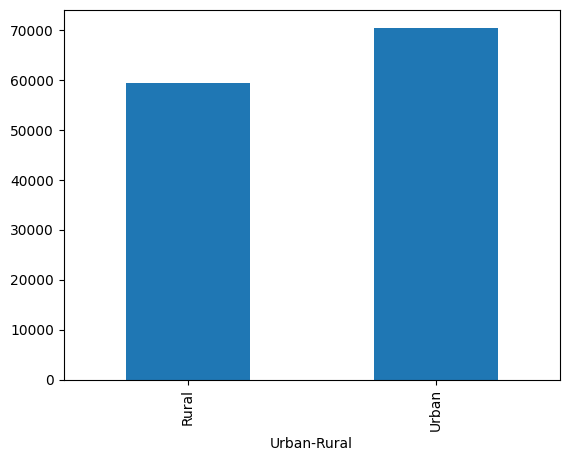

In [9]:
filtered_df.groupby(['Urban-Rural'])['Median Household Income'].mean().plot(kind = 'bar')

In [10]:
#Groups median household income by state and whether it's urban or rural
filtered_urban_rural = filtered_df.groupby(['State', 'Urban-Rural'])['Median Household Income'].mean()

In [11]:
nc_urban_rural = filtered_df[filtered_df['State'] == 'North Carolina'].groupby(['State', 'Urban-Rural'])['Median Household Income'].mean()

<Axes: xlabel='State,Urban-Rural'>

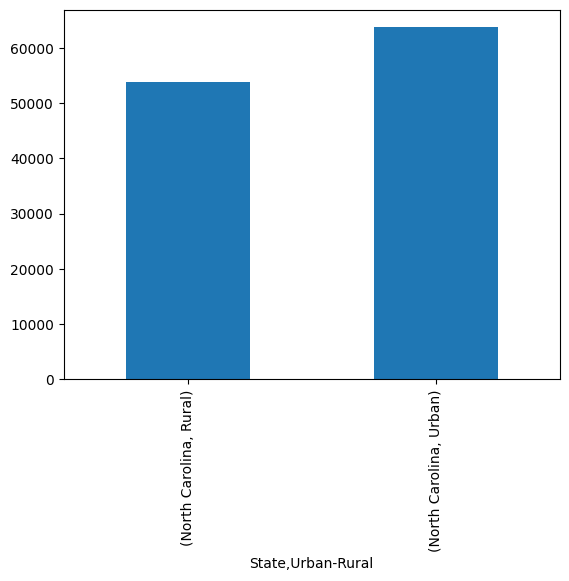

In [13]:
nc_urban_rural.plot(kind = 'bar')

<Axes: xlabel='Median Household Income', ylabel='State'>

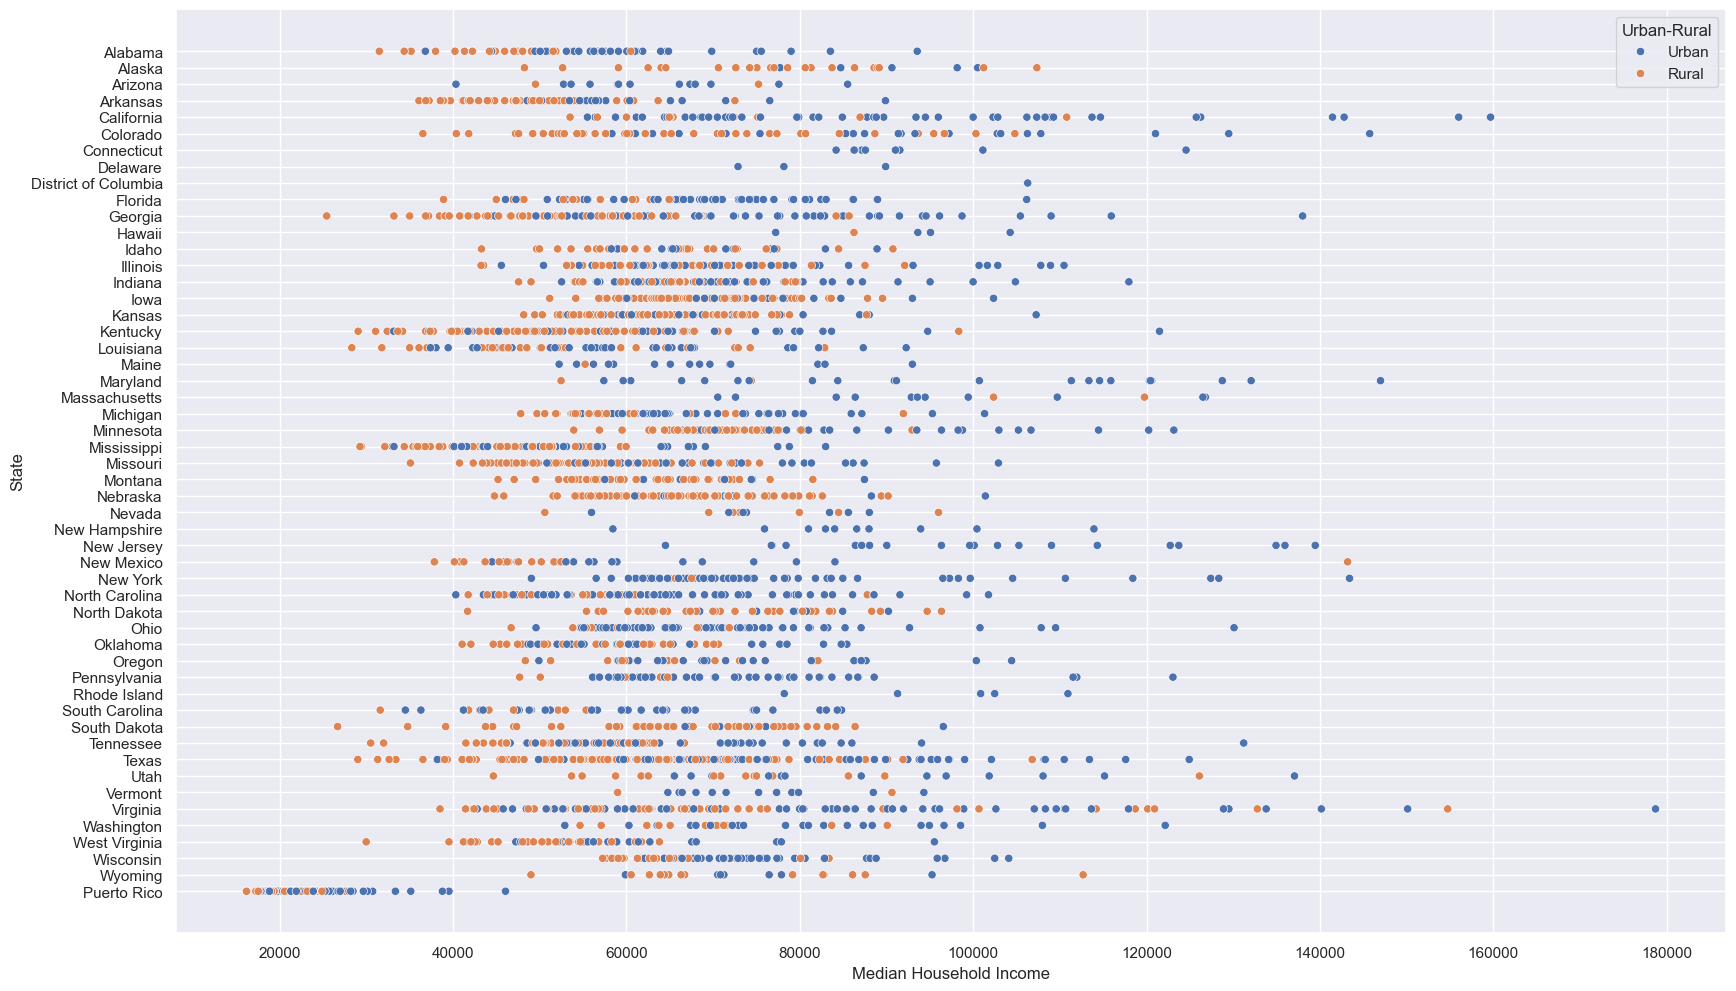

In [14]:
sns.set(rc={"figure.figsize":(20,12)}) # change the figure size to width=20, height=12
sns.scatterplot(data=filtered_df, x='Median Household Income', y='State', hue='Urban-Rural')

In [15]:
nc_df = filtered_df[filtered_df['State'] == 'North Carolina']

In [16]:
va_df = filtered_df[filtered_df['State'] == 'Virginia']

In [18]:
pr_df = filtered_df[filtered_df['State'] == 'Puerto Rico']

<Axes: xlabel='Total Population', ylabel='Median Household Income'>

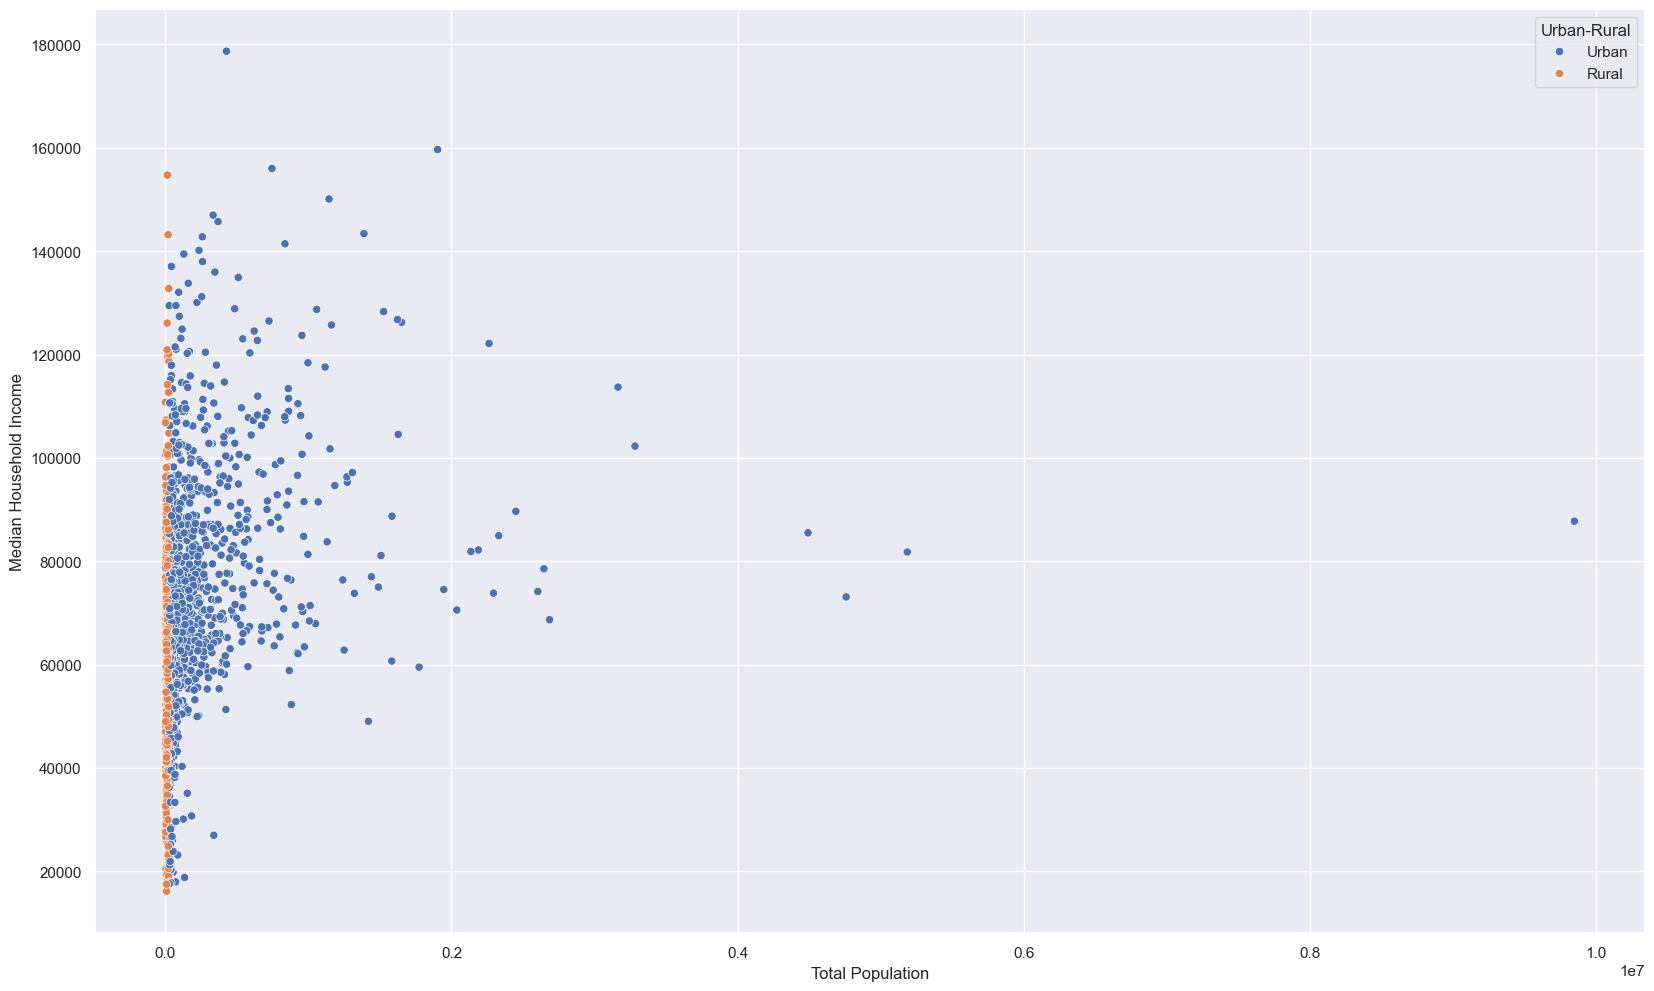

In [20]:
sns.set(rc={"figure.figsize":(20,12)}) # change the figure size to width=20, height=12
sns.scatterplot(data=filtered_df, x='Total Population', y='Median Household Income', hue='Urban-Rural')

<Axes: xlabel='Total Population', ylabel='Median Household Income'>

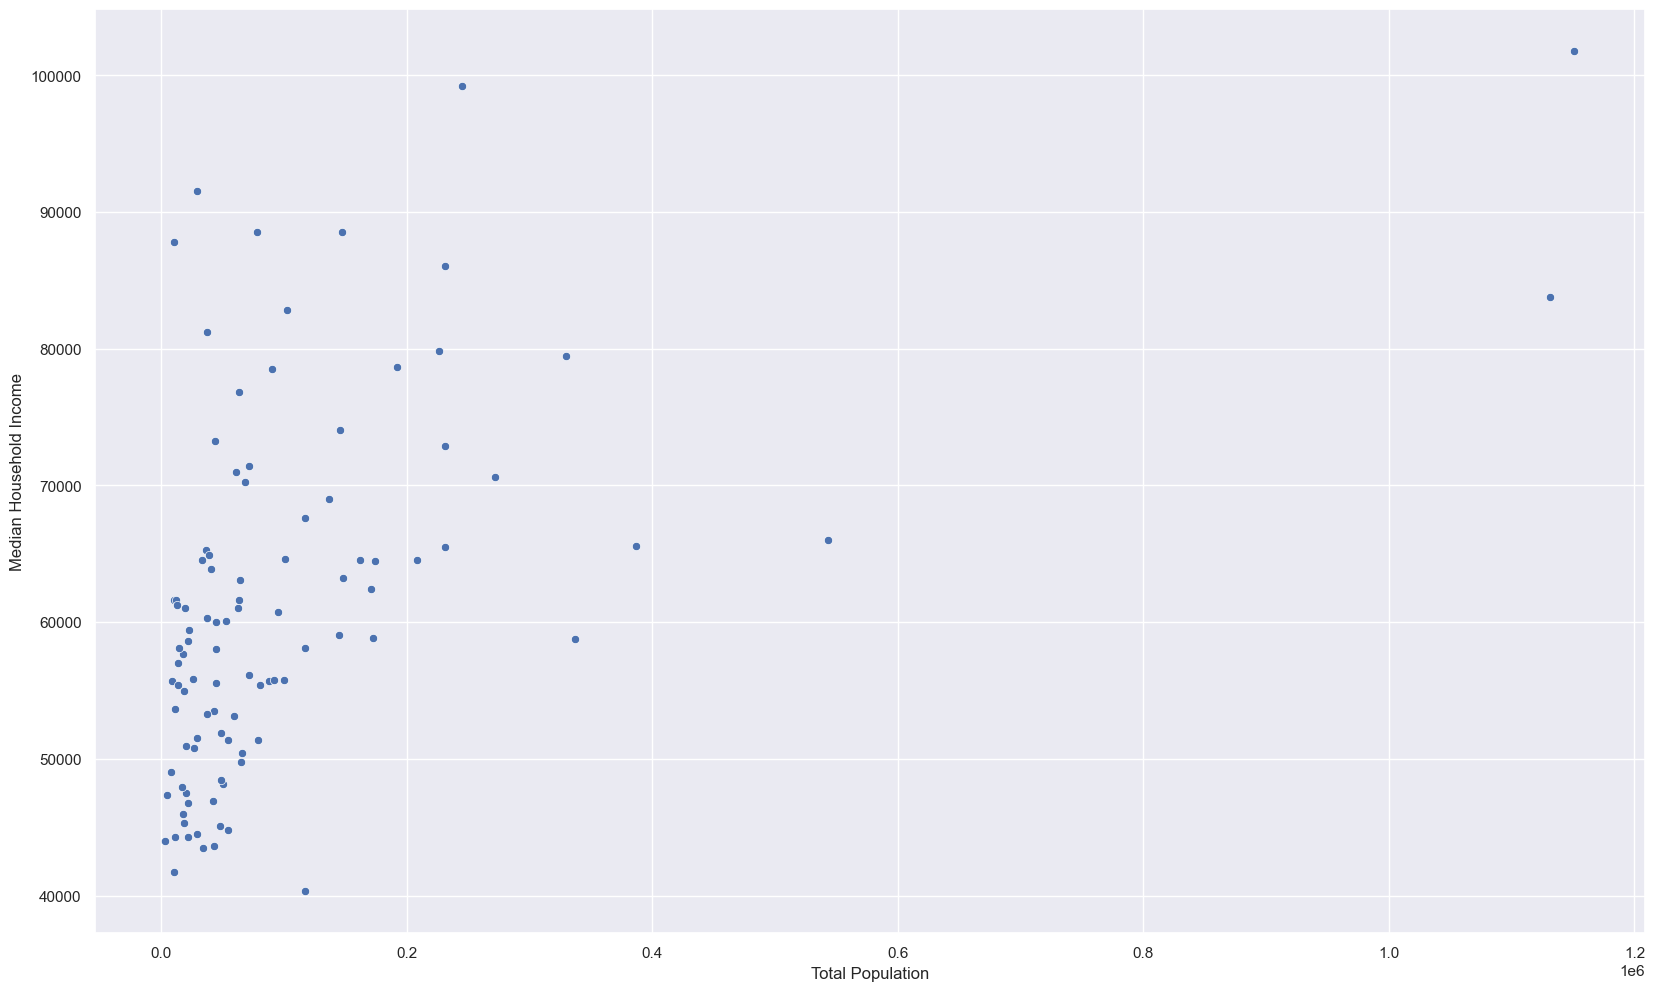

In [33]:
sns.set(rc={"figure.figsize":(20,12)}) # change the figure size to width=20, height=12
sns.scatterplot(data=nc_df, x='Total Population', y='Median Household Income')

<Axes: xlabel='Total Population', ylabel='Median Household Income'>

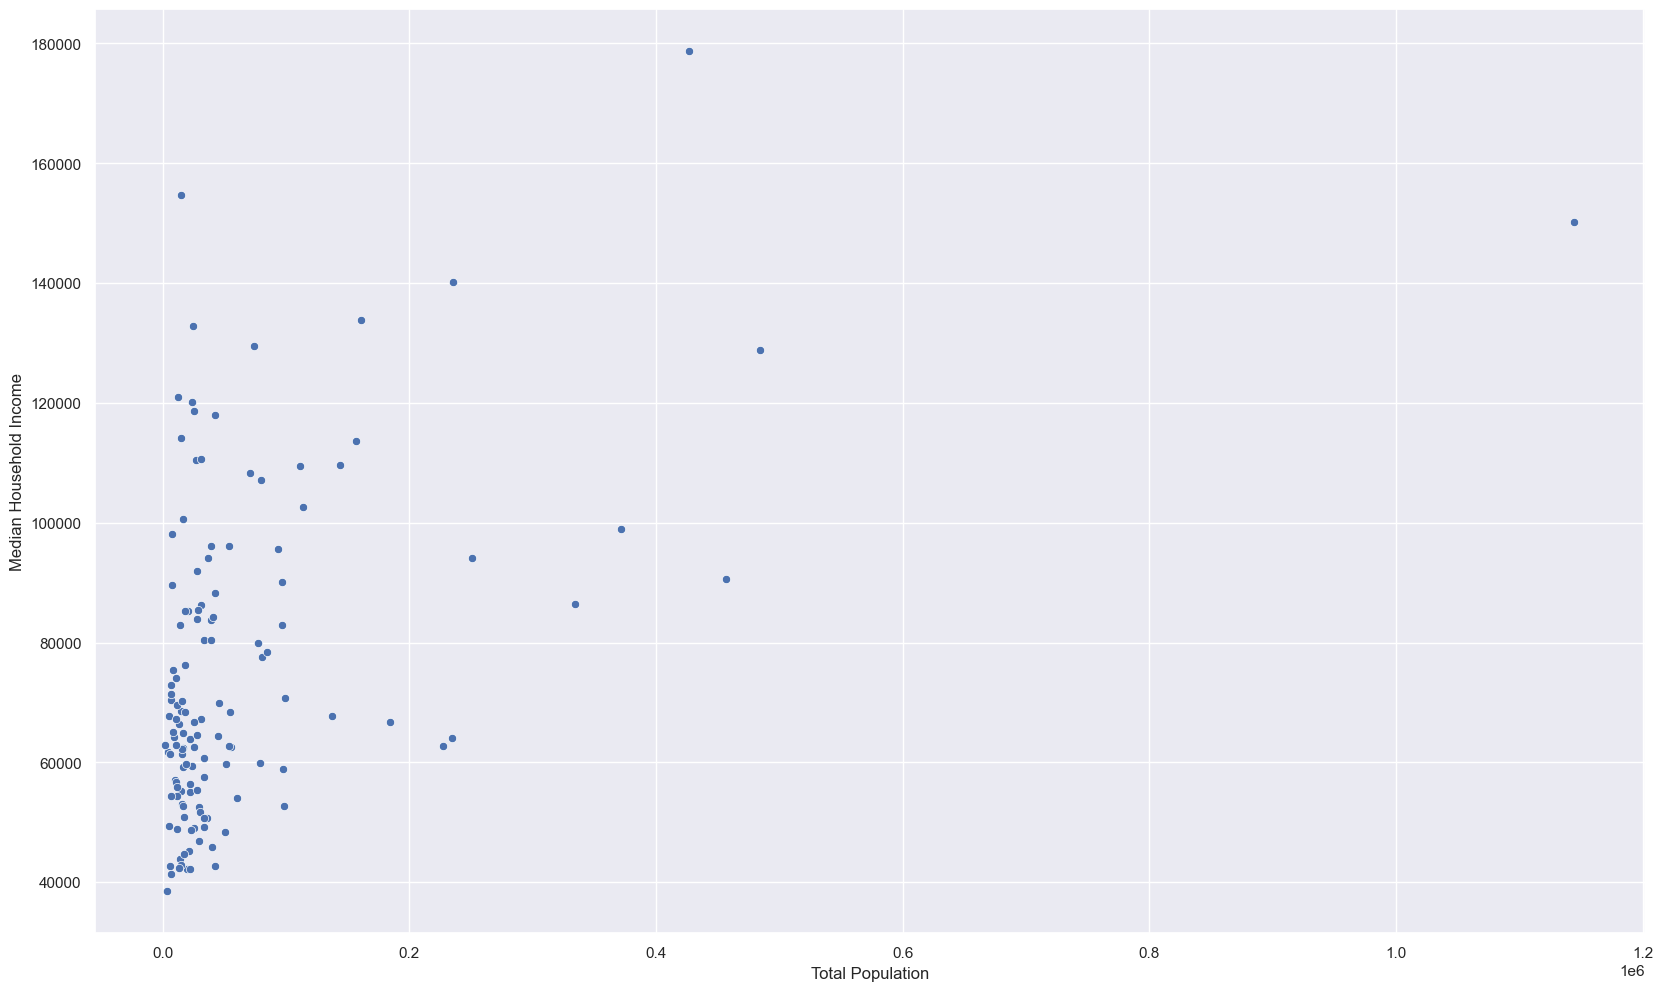

In [32]:
sns.set(rc={"figure.figsize":(20,12)}) # change the figure size to width=20, height=12
sns.scatterplot(data=va_df, x='Total Population', y='Median Household Income')

<Axes: xlabel='Total Population', ylabel='Median Household Income'>

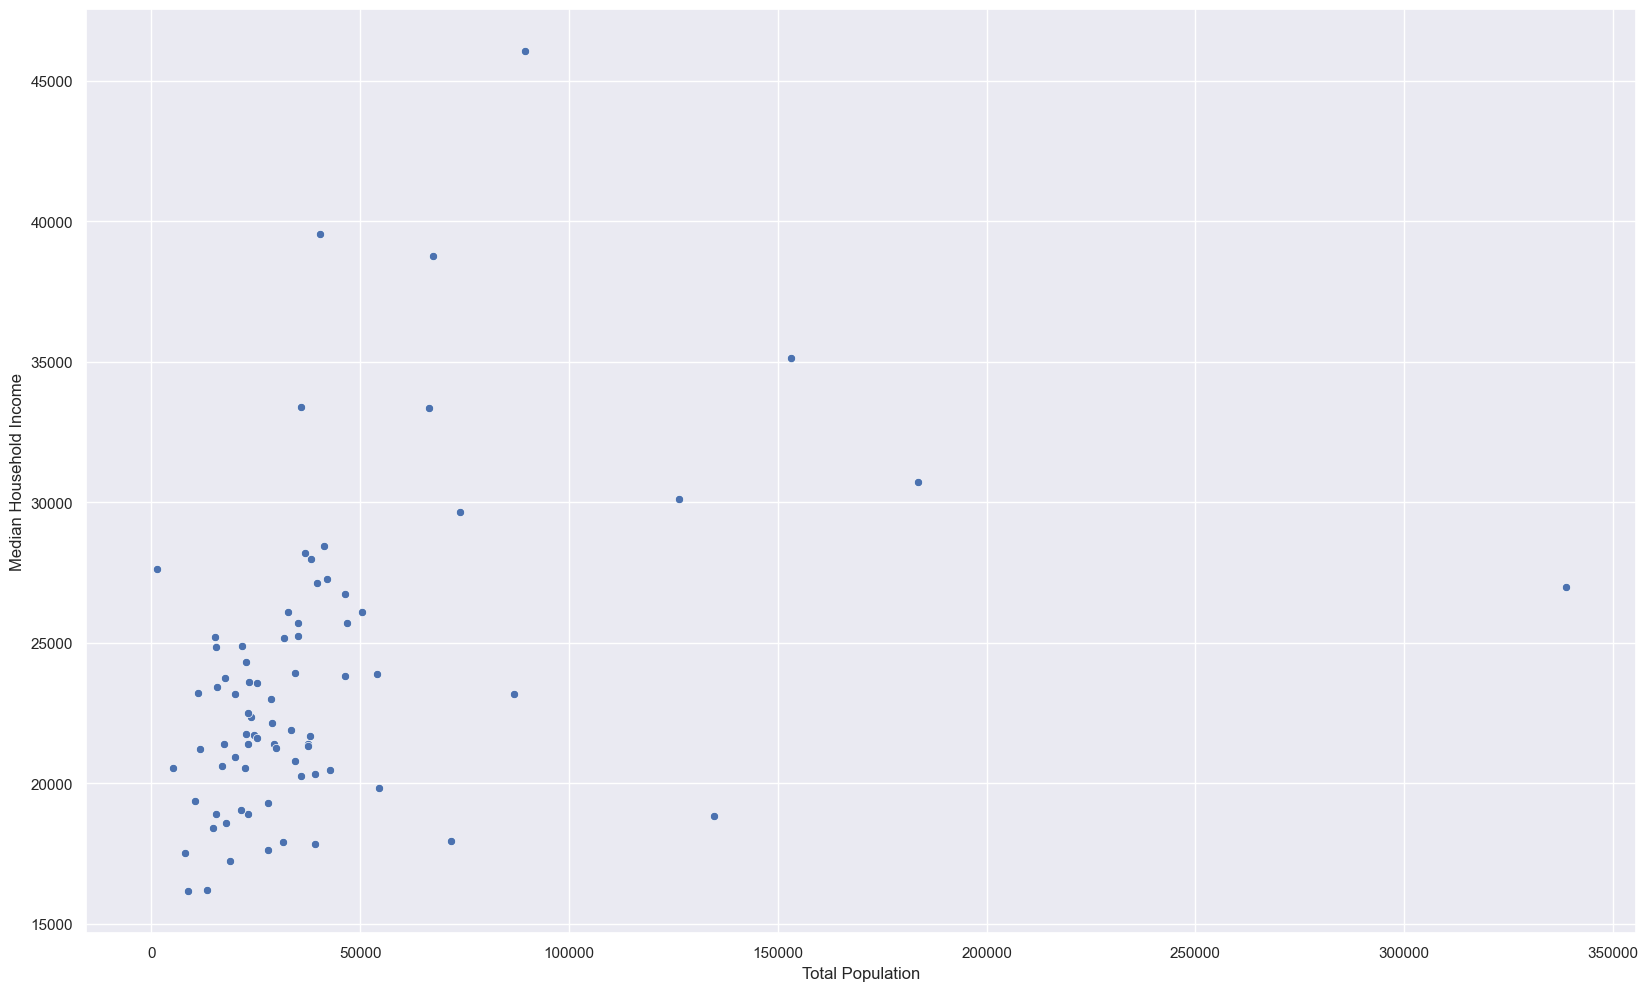

In [31]:
sns.set(rc={"figure.figsize":(20,12)}) # change the figure size to width=20, height=12
sns.scatterplot(data=pr_df, x='Total Population', y='Median Household Income')

## Findings
When comparing the median income between urban and rural counties, there is a clear trend of urban counties being wealthier than rural counties in every state that has a rural county (Connecticut does not have any rural counties). Though urban counties tend to have higher incomes than rural counties, the most populous counties are not always the counties witht the highest median household incomes. In the cases of both North Carolina and Virginia, the counties with highest income were not the most populous. Virginia also appeared to have a large median household income range, with their being a massive difference between their county witht he lowest income and their county with the highest income.

There was one unintended finding from this data, which is the large disparity between median household incomes of counties in Puerto Rico and those of counties within a state. The counties with the lowest median household incomes were found in Puerto Rico, and the Puerto Rican county with the heighest median household income was still far below many urban counties within states.

## Impact
These findings provide important insight into the economic disparities between urban and rural counties, and which states have the largest disparity. The unequal economic condition of Puerto Rico when compared to states was also shown through this data set. One possible harm of this data is it being used to make disparaging claims about states (or a territory in the case of Puerto Rico) that have low median household incomes, and being used to portray rural areas as poor and downtrodden.